# <center><font color="red">https://s.id/himasta-undip-2024</font></center>

<center><img alt="" src="images/covers/cover-undip-2024.jpg"/></center> 

## <center><font color="blue">taudata Analytics™</font><br>(C) Taufik Sutanto - 2024<br>https://taudata-analytics.com</center>

# <center><font color="blue">Asumsi Seminar Lomba</font></center>

### <font color="blue">**Tantangan**</font>: 

 - Peserta dengan berbagai latar belakang pengetahuan
 - Hanya 85 menit (35 menit diskusi)
 
### <font color="blue">**Strategi**</font>:
 - Fokus ke **Aplikasi** terutama kepentingan lomba BDC - Satria Data
 - Fokus **tips & trik** mendapatkan akurasi tinggi di suatu kompetisi (baik data teks, image, atau bahkan suara)
 - **Code, Module, & Data** diberikan via GitHub dan dapat langsung dijalankan langsung di Google Colab
 - Peserta harus FOKUS ... :)

<center><img src="images/posters/poster-undip-2024.jpg" width="200" /></center>

><font color="green">"*Minimum requirements & Maximum adjustments are two steps for Happy & Successful Life*" ~ Maulik Jadav</font>

# <center><font color="blue">Outline Seminar/Workshop</font></center>

* Pendahuluan Deteksi Bot: definisi, signifikansi, & metode
* Tantangan Deteksi Bot
* Loading & Preprocessing Data
* Representasi Data
* beberapa Model Dasar & pemilihan model
* (Cross) validasi & mengapa berbeda dengan penelitian pada umumnya?
* Pipeline: Optimasi {representasi dokumen, model} - kunci penting keberhasilan lomba
* Penutup & Diskusi:
  - Data Tidak Terstruktur + Terstruktur + Feature Engineering
  - Preprocessing yang berbeda ==> pipeline
  - Error Analysis & Augmentasi Data - kunci utama keberhasilan lomba
  - Pitfalls yang harus dihindari

<center><img src="images/bot-detection-steps.png" width="400"/></center>

><font color="green">"*I always have a basic plot outline, but I like to leave some things to be decided while I write*." ~ J. K. Rowling</font>

# <center><font color="blue">Bot? Spam? Cyber Army/Buzzer?</font></center>

1. **Bot**: Program komputer yang secara otomatis melakukan tugas tertentu di media sosial, seperti posting atau memberikan respons, seringkali tanpa intervensi manusia.
2. **Spam**: Pesan yang tidak diinginkan yang seringkali dikirim secara massal, biasanya berisi promosi atau tautan yang tidak relevan, dapat mengganggu pengalaman pengguna media sosial.
3. **Buzzer/cyber Army**: Seseorang yang dibayar atau memperoleh keuntungan untuk mempromosikan atau membahas suatu produk, layanan, atau topik tertentu di media sosial, seringkali tanpa memberikan informasi bahwa mereka menerima bayaran atau insentif.

<center><img src="images/spambot.png" width="400"/></center>

# <center><font color="blue">Mengapa Penting?</font></center>

* Dapat mengganggu pengalaman pengguna media sosial dengan membanjiri platform dengan konten yang tidak relevan atau menyesatkan. 
* Bot dapat digunakan untuk menyebarkan informasi palsu atau memanipulasi opini publik, sementara spam dapat mengganggu komunikasi yang sehat antara pengguna. 
* Mengidentifikasi dan menghapus bot dan spam membantu memastikan bahwa pengguna mendapatkan konten yang bermutu dan relevan.
* Filtering bot & spam meyakinkan insight dari hasil analisa data tidak bias.

<center><img src="images/bot-trump-clinton.png" width="400"/></center>

# <center><font color="blue">Tantangan 01</font></center>

* Evolusi teknik bot untuk meniru perilaku manusia, seperti penyesuaian pola posting dan penggunaan akun palsu yang sulit dibedakan dari akun manusia. 
* Bot dapat menggunakan algoritma yang rumit untuk mengelabui sistem deteksi. 
* Jumlah akun dan volume aktivitas di media sosial begitu banyak

<center><img src="images/bot-detection-challenges.png" width="800"/></center>

# <center><font color="blue">Metode Deteksi Bot</font></center>

* Pada dasarnya "hanya" masalah klasifikasi biner.
* Apakah metode yang kompleks/baru selalu lebih unggul? (dalam konteks lomba)
* Apakah suatu metode akurat untuk semua jenis bot?
* Bagaimana data diambil mempengaruhi pola bot, sehingga mempengaruhi metode deteksinya.
* Jangan lupa prinsip Parsimoni di Statistika atau Occam Razor di Machine Learning.

<center><img src="images/bot-detection-techniques.png" width="600"/></center>

# <center><font color="blue">Tantangan 02</font></center>

* Bagaimana kita mendefenisikan Bot mempengaruhi cara mendeteksinya.
* Misal Botometer: https://botometer.osome.iu.edu/
* Drone Emprit: https://www.slideshare.net/IsmailFahmi3/workshop-sentiment-emotion-demography-and-bot-detection

<center><img src="images/bot-characteristics.png" width="600"/></center>
> Chu, Z., S. Gianvecchio, H. Wang, and S. Jajodia. (2012) “Detecting Automation of Twitter Accounts: Are You a Human, Bot, or Cyborg?”
IEEE Trans. Dependable and Secure Computer 9 (6) : 811–824.

# <center><font color="red">Mari Kita Mulai Beraksi!</font></center>

* Data yang digunakan berasal dari skripsi salah satu mahasiswa saya.
* Ingat teori diatas, hal-hal yang berhasil di data ini belum tentu berhasil di data bot detection yang lain walaupun sama-sama dari twitter.  Perlu pahami kapan ambil datanya, apa keywordsnya, apa filternya, dsb.

<center><img src="images/mulai-coding.jpg" width="600"/></center>

In [1]:
# import Semua Module yang digunakan
import warnings; warnings.simplefilter('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns, re
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from textblob import TextBlob, Word
from html import unescape
from unidecode import unidecode
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

lemma_id = StemmerFactory().create_stemmer()
factory = StopWordRemoverFactory()
stopWordsID = set(factory.get_stop_words())

seed=1105
sns.set(style="ticks", color_codes=True)
np.random.seed(seed)

"Done"

'Done'

In [2]:
# Loading Data
file_ = "data/twitter-bot.csv"
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)
    
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  3000 , Kolom (jumlah variabel) =  14


,id_str,username,screen_name,created_at,friends_count,followers_count,favourited_count,statuses_count,full_text,description,text_created_at,text_favourites_count,text_retweets_count,label
0,1.46E+18,Aqilacute10,Aqila_cute,Mon Nov 01 19:00:53 +0000 2021,188,745,1671,2222,"Jika kau yakin dan percaya, maka mimpimu pun a...",Lulusan al-Azhar · Qari' · Pecinta Quran\n\nDo...,Fri Jul 08 02:02:23 +0000 2022,5,2,1
1,1.50E+18,Kemilau16104667,Kemilau,Tue Feb 22 23:11:01 +0000 2022,343,145,2,630,Pemerintah serahkan pengelolaan dua menara rus...,NaN,Sat Jul 16 00:07:32 +0000 2022,0,0,1
2,163586591,nasehatmuslim,Baik Berkata & Bertindak,Tue Jul 06 20:06:35 +0000 2010,562,662,5943,15356,"Rasulullah Muhammad bersabda,\n\nTidak boleh m...","Pengusaha, peneliti, dosen, wakil ketua, dai, ...",Mon Jul 18 14:45:36 +0000 2022,1,0,1
3,1.43E+18,putrisrikandi_,srikandi_,Mon Sep 06 08:51:51 +0000 2021,444,376,648,7204,Pemerintah lakukan serah Terima status penggun...,🇮🇩🇮🇩🇮🇩🇮🇩🇮🇩,Sat Jul 16 01:19:24 +0000 2022,0,0,1
4,1.53E+18,arisa_fadillah,Fadillah Arisa,Thu Jun 09 03:39:10 +0000 2022,31,22,0,21,PT PLN (Persero) menerima kompensasi dari peme...,gemuk gak kurus,Fri Jul 08 01:53:34 +0000 2022,0,1,1


# <center><font color="red">Stop! ==> Data Understanding Dulu</font></center>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_str                 3000 non-null   object
 1   username               3000 non-null   object
 2   screen_name            2999 non-null   object
 3   created_at             3000 non-null   object
 4   friends_count          3000 non-null   int64 
 5   followers_count        3000 non-null   int64 
 6   favourited_count       3000 non-null   int64 
 7   statuses_count         3000 non-null   int64 
 8   full_text              3000 non-null   object
 9   description            2354 non-null   object
 10  text_created_at        3000 non-null   object
 11  text_favourites_count  3000 non-null   int64 
 12  text_retweets_count    3000 non-null   int64 
 13  label                  3000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 328.2+ KB


# <center><font color="blue">Untuk masalah klasifikasi cek distribusi label</font></center>

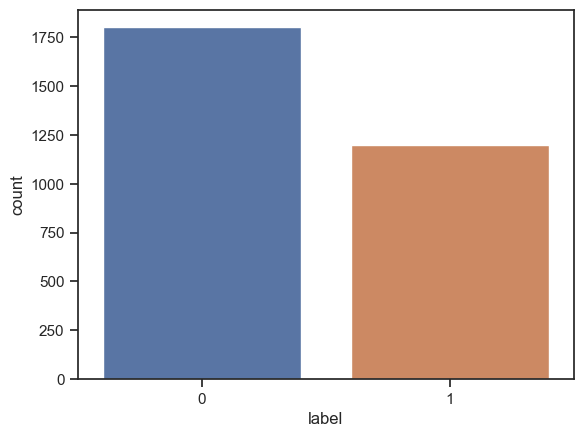

Counter({0: 1800, 1: 1200})
0 =  60.0  1 =  40.0 %


In [4]:
sns.countplot(data=df, x='label')
plt.show()
D = Counter(df['label'])
print(D)
print("0 = ", D[0]*100/(len(df['label'])), ' 1 = ',D[1]*100/(len(df['label'])) ,'%')

# <center><font color="blue">Klasifikasi text</font></center>

* TF-IDF kalau ML biasa, Word Embedding untuk Deep Learning
* tf-idf cukup "lawas", dilain waktu bisa coba BM25 dan variasinya atau word embedding (Deep learning).
* Namun filosofi/tips & trik yang akan kita bahas tetap sama bahkan untuk Computer Vision sekalipun.

<center><img src="images/klasifikasi-text.png" width="400"/></center>

# <center><font color="blue">Preprocessing Data Teks</font></center>

* Detail di: https://www.youtube.com/watch?v=FL_FLfzVrk8&list=PLiCHAahHeea-HpkOddo5tQFnb2cTGpemB
* Github-nya pindah ke: https://github.com/taudataanalytics/taudata-Academy
* blognya tetap: https://taudata.blogspot.com/

<center><img src="images/text-preprocessing.jpg" width="400"/></center>

In [5]:
# preprocessing text sederhana

def cleanText(T, min_charLen=2, max_charLen=18, stopFilter=True, lemma=False):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',T) #remove urls if any
    pattern = re.compile(r'ftp[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',t) #remove urls if any
    t = unescape(t) # html entities fix
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = t.replace('\n', ' ').replace('\r', ' ')
    listKata = re.sub(r'[^.,_a-zA-Z0-9 -\.]','',t)
    listKata = TextBlob(listKata).words        
    if lemma:
        listKata = lemma_id.stem(' '.join(listKata).replace("'","").replace('"','')).split()
    if stopFilter:
        listKata = [tok for tok in listKata if (str(tok) not in stopWordsID)]
    listKata = [tok for tok in listKata if len(str(tok))>=min_charLen and len(str(tok))<=max_charLen] 
    return ' '.join(listKata)# Return kalimat lagi

# Testing

### # Hati-hati HashTag bisa jadi Fitur penting

In [6]:
T = "Badan Riset dan Inovasi Nasional (BRIN) mengakui kinerja Erick Thohir dalam menciptakan lapangan kerja lewat program kredit usaha rakyat (KUR) #ETSolusiBUMNSehat`ersih https://t.co/BahypKTt4b"
print("Teks Awal:\n", T)
d = cleanText(T)
print("\nHasil Preprocessing:\n", d)

Teks Awal:
 Badan Riset dan Inovasi Nasional (BRIN) mengakui kinerja Erick Thohir dalam menciptakan lapangan kerja lewat program kredit usaha rakyat (KUR) #ETSolusiBUMNSehat`ersih https://t.co/BahypKTt4b

Hasil Preprocessing:
 badan riset inovasi nasional brin mengakui kinerja erick thohir menciptakan lapangan kerja lewat program kredit usaha rakyat kur


In [7]:
df['cleanTweet'] = df['full_text'].apply(cleanText)

df[['full_text', 'cleanTweet']].head()

,full_text,cleanTweet
0,"Jika kau yakin dan percaya, maka mimpimu pun a...",kau yakin percaya mimpimu menjadi nyata semang...
1,Pemerintah serahkan pengelolaan dua menara rus...,pemerintah serahkan pengelolaan menara rusun b...
2,"Rasulullah Muhammad bersabda,\n\nTidak boleh m...",rasulullah muhammad bersabda melakukan berbaha...
3,Pemerintah lakukan serah Terima status penggun...,pemerintah lakukan serah terima status penggun...
4,PT PLN (Persero) menerima kompensasi dari peme...,pt pln persero menerima kompensasi pemerintah ...


# <center><font color="blue">TF-IDF</font></center>

<img alt="" src="images/toydata_vsm.png" />

* Menurut http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* default formula tf-idf yang digunakan sk-learn adalah:
* $tfidf = tf * log(\frac{N}{df+1})$ ==> Smooth IDF
* namun kita merubahnya menjadi:
* $tfidf = tf * log(\frac{N}{df})$ ==> Non Smooth IDF
* $tfidf = tf * log(\frac{N}{df+1})$ ==> linear_tf, Smooth IDF
* $tfidf = (1+log(tf)) * log(\frac{N}{df})$ ==> sublinear_tf, Non Smooth IDF

In [8]:
tfidf_vectorizer = TfidfVectorizer(smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.99, min_df=2)

# <center><font color="blue">(Cross) Validasi</font></center>

* Berapa banyak Test Data?
* Beda di Industri/kompetisi dan di dunia akademik

<center><img src="images/feature_5_fold_cv.jpg" width="600"/></center>

In [9]:
x_trainTxt, x_testTxt, y_train, y_test = train_test_split(df['cleanTweet'], df['label'], test_size=0.3, random_state=seed)
x_train = tfidf_vectorizer.fit_transform(x_trainTxt) # "Fit_Transform"
x_test = tfidf_vectorizer.transform(x_testTxt) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(2100, 5001) (900, 5001)


# Model Selection (Text Only)

### Default parameter dulu (belum optimasi parameter)
### Karena keterbatasan waktu kita coba hanya 4 model

In [10]:
# Model-model dasar (belum optimasi parameter)
svm_ = svm.SVC()
nn_ = MLPClassifier()
rf_ = RandomForestClassifier()
xgb = GradientBoostingClassifier()

models = (("SVM", svm_), ("NeuralNetwork", nn_), ("RandomForest", rf_), ("XGboost", xgb))

In [11]:
# Di lomba cv ganti setidaknya 10

Scores = {}
for model in tqdm(models):
    Scores[model[0]] = cross_val_score(model[1], x_train, y_train, cv=5, n_jobs=-1) 

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:45<00:00, 11.26s/it]


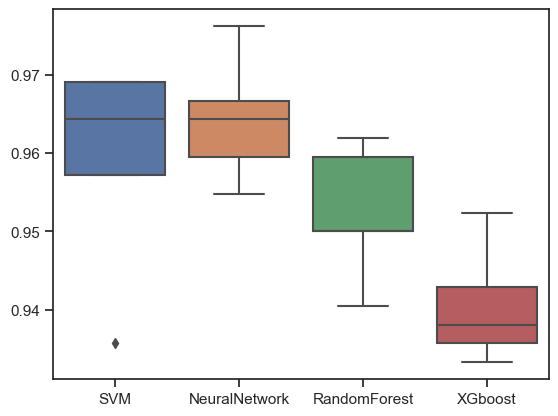

In [12]:
Scores = pd.DataFrame(Scores)
sns.boxplot(data=Scores)
plt.show()

# Pilih yang mana? Mengapa?

### Perhatikan sudah cukup akurat! ==> tapi tidak selalu seperti ini.

# <center><font color="blue">Optimasi Parameter & Pipelining</font></center>

* Optimasi parameter + Optimasi Preprocessing + Optimasi Representasi Dokumen==> Pipelining!!!... 
* Saya contohkan di SVM

<center><img src="images/ML-pipeline.png" width="600"/></center>

In [13]:
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV

pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'verbose']


In [ ]:
# Hati-hati ini cukup lama!!!....
# Di Lomba yang sebenarnya gunakan ruang parameter yang lebih luas/banyak.
# Di lomba cv ganti setidaknya 10

paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

pipeSvmCV = GridSearchCV(pipeSVM, paramsSVM, cv=5, scoring="accuracy", verbose=2, n_jobs=-1)
pipeSvmCV.fit(x_trainTxt, y_train) # HATI-HATI disini ... karena kita optimalkan representasi, maka input text BUKAN VSM tapi Text!!!....
print(pipeSvmCV.best_score_)
print(pipeSvmCV.best_params_)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


In [ ]:
svm_opt = pipeSvmCV.cv_results_['mean_test_score']#[:10]

models = ['SVM', 'SVMopt']
scores = [Scores["SVM"], svm_opt]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

# <center><font color="blue">Performa di test Data</font></center>

In [ ]:
prediksi = pipeSvmCV.predict(x_test)
print(classification_report(y_test, prediksi))

# <center><font color="blue">Tips Penting</font></center>

<center><img src="images/tips.png" width="400"/></center>

* Data Tidak Terstruktur + Terstruktur + Feature Engineering
* Preprocessing yang berbeda ==> pipeline
* Analisa Text Analytics dan-atau EDA pada setiap kategori (bot dan bukan bot) ==> gunakan Voyant biar mudah.
* Mau lebih yakin dengan modelnya? gunakan seed yang berbeda.
* Error Analysis & Augmentasi Data - kunci utama keberhasilan lomba
* Di seminar ini kita hanya menggunakan SVM, parameter yg sempit, dan percobaan yang terbatas. Tapi komputasinya sudah amat sangat besar. Bayangkan jika anda menggunakan setting experiment ini menggunakan model Deep Learning.
* Apakah Deep Learning most likely lebih baik dari model dasar? Mengapa? Apa syaratnya DL cenderung lebih baik?
* Apa kelemahan DL pada kasus bot detection ini?
* Lakukan Sensitivity Analysis (optional, berguna untuk permasalahan yang chaotic)

# <center><font color="blue">Pitfalls:</font></center>

* Tidak melakukan EDA dengan baik (disini kita skip EDA karena waktu yang sangat singkat)
* Hanya menggunakan satu preprocessing
* Ketika di percobaan awal akurasi jelek karena overfitting, tapi malah meningkatkan kompleksitas model
* Tidak melakukan Error Analysis
* Model dan setting terbaik butuh banyak sekali komputasi, jangan pernah kerjakan mepet deadline + bagi tugas dengan baik ke Team

<center><img src="images/pitfalls.png" width="400"/></center>

# <center><font color="blue">Diskusi</font></center>

<center><img src="images/diskusi.jpg" width="400"/></center>

# <center><font color="blue">Sekian, Terima Kasih.</font></center>

<center><img src="images/theend-thankyou.png" width="400"/></center>